# Exploratory Data Analysis (EDA)

This notebook focuses on exploratory data analysis of the bank transaction dataset.
The goal is to understand data distribution, detect potential issues, and gain insights
that help in feature engineering and model selection for fraud detection.


## 1. Import Required Libraries

We import common data analysis and visualization libraries used throughout the EDA process.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings('ignore')
# For better visualization
%matplotlib inline
sns.set_style("whitegrid")

## 2. Load Dataset

The dataset is loaded from the `data` directory.  
Each row represents a transaction, and the target variable is `Fraud_Label`.


In [2]:
DATA_PATH = "../data/fraud_dataset_mod.csv"
df = pd.read_csv(DATA_PATH)

# Display first 5 rows
df.head()


,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,NaN,0.0,...,7.0,437.63,3.0,Amex,65.0,883.17,Biometric,0.8494,0.0,0.0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0.0,...,13.0,478.76,4.0,Mastercard,186.0,2203.36,Password,0.0959,0.0,1.0
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0.0,...,14.0,50.01,4.0,Visa,226.0,1909.29,Biometric,0.8400,NaN,1.0
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0.0,...,8.0,182.48,4.0,Visa,NaN,1311.86,OTP,0.7935,0.0,1.0
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0.0,...,14.0,328.69,4.0,Mastercard,140.0,966.98,Password,0.3819,1.0,1.0


## 3. General Dataset Information

We inspect the dataset shape, data types, and missing values
to understand the structure and quality of the data.


In [3]:
# 3. General Information
# -------------------------------
print("Dataset shape:", df.shape)
print("\nColumns and data types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())


Dataset shape: (50000, 21)

Columns and data types:
 Transaction_ID                   object
User_ID                          object
Transaction_Amount              float64
Transaction_Type                 object
Timestamp                        object
Account_Balance                 float64
Device_Type                      object
Location                         object
Merchant_Category                object
IP_Address_Flag                 float64
Previous_Fraudulent_Activity    float64
Daily_Transaction_Count         float64
Avg_Transaction_Amount_7d       float64
Failed_Transaction_Count_7d     float64
Card_Type                        object
Card_Age                        float64
Transaction_Distance            float64
Authentication_Method            object
Risk_Score                      float64
Is_Weekend                      float64
Fraud_Label                     float64
dtype: object

Missing values:
 Transaction_ID                  1104
User_ID                          948
T

## 4. Descriptive Statistics

Summary statistics for numerical features provide insights
into value ranges, distributions, and potential outliers.


In [4]:
# 4. Numerical Descriptive Statistics
# -------------------------------
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Transaction_Amount,49018.0,99.471679,98.813840,0.0000,28.6700,69.68000,138.9700,1174.14
Account_Balance,48984.0,50290.524430,28771.001107,500.4800,25329.6500,50378.44000,75147.5800,99998.31
IP_Address_Flag,49076.0,0.050350,0.218669,0.0000,0.0000,0.00000,0.0000,1.00
Previous_Fraudulent_Activity,48969.0,0.098287,0.297705,0.0000,0.0000,0.00000,0.0000,1.00
Daily_Transaction_Count,48971.0,7.487697,4.039885,1.0000,4.0000,7.00000,11.0000,14.00
Avg_Transaction_Amount_7d,49004.0,255.260458,141.365894,10.0000,132.1425,256.06500,377.9625,500.00
Failed_Transaction_Count_7d,49017.0,2.003754,1.414411,0.0000,1.0000,2.00000,3.0000,4.00
Card_Age,49040.0,120.081505,68.926331,1.0000,60.0000,120.00000,179.0000,239.00
Transaction_Distance,48975.0,2500.407736,1441.692009,0.2500,1259.5350,2492.19000,3746.7250,4999.93
Risk_Score,49018.0,0.501831,0.287815,0.0001,0.2542,0.50285,0.7499,1.00


## 5. Target Variable Distribution

We analyze the distribution of fraudulent vs non-fraudulent transactions.
This step is crucial to identify class imbalance.


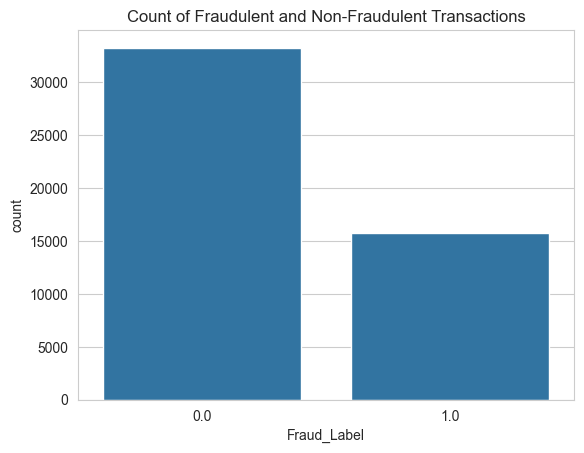

In [5]:
# 5. Class Distribution (Fraud_Label)
# -------------------------------
sns.countplot(x='Fraud_Label', data=df)
plt.title("Count of Fraudulent and Non-Fraudulent Transactions")
plt.show()

In [6]:
# Percentage of fraudulent transactions
fraud_percent = df['Fraud_Label'].value_counts(normalize=True) * 100
print(f"Fraudulent transactions: {fraud_percent[1]:.2f}%")
print(f"Non-fraudulent transactions: {fraud_percent[0]:.2f}%")

Fraudulent transactions: 32.08%
Non-fraudulent transactions: 67.92%


## 6. Correlation Analysis

Correlation between numerical features is visualized to identify
potential multicollinearity and strong relationships.


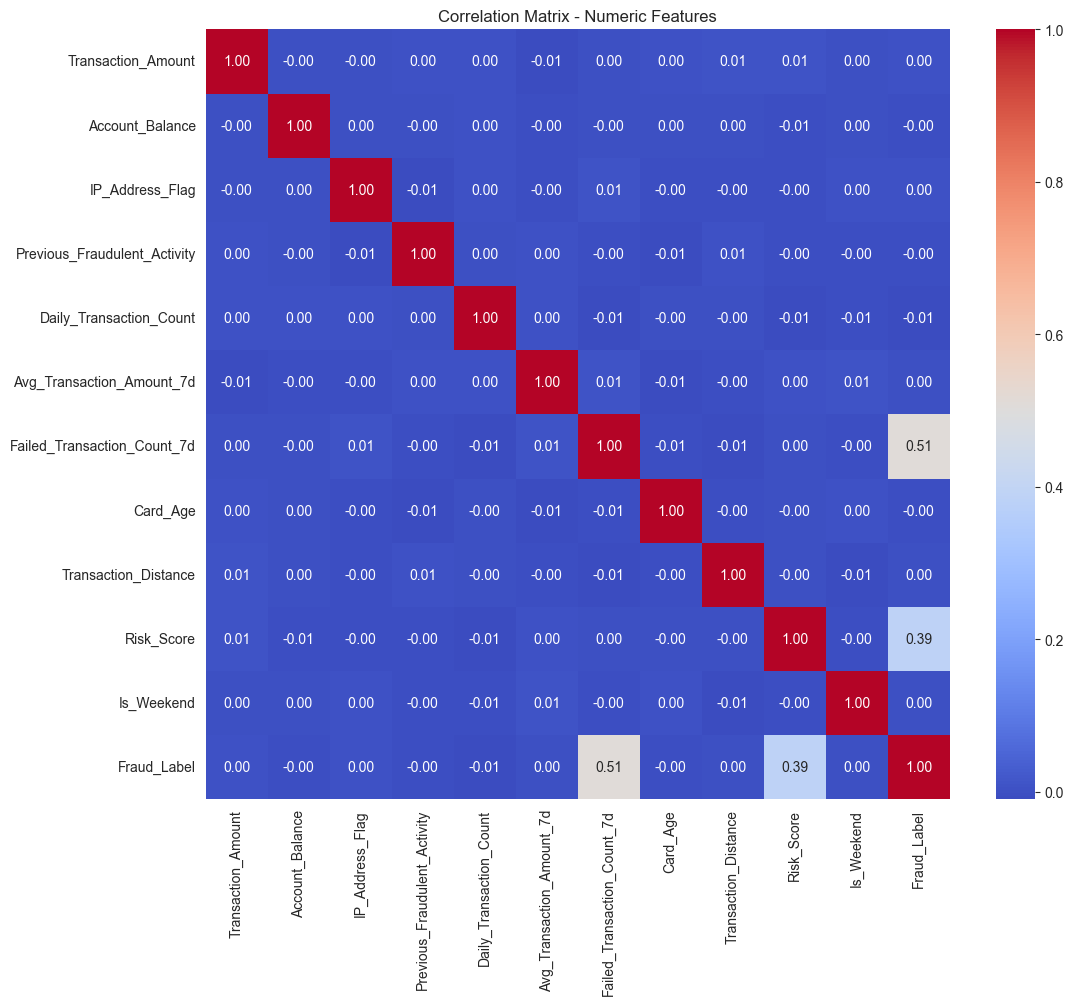

In [6]:
# 6. Correlation Matrix for Numeric Features
# -------------------------------
numeric_cols = df.select_dtypes(include=['float64']).columns
plt.figure(figsize=(12,10))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix - Numeric Features")
plt.show()


## 7. Numerical Feature Distributions

Histograms are used to visualize the distribution of numerical features
and detect skewness or abnormal patterns.


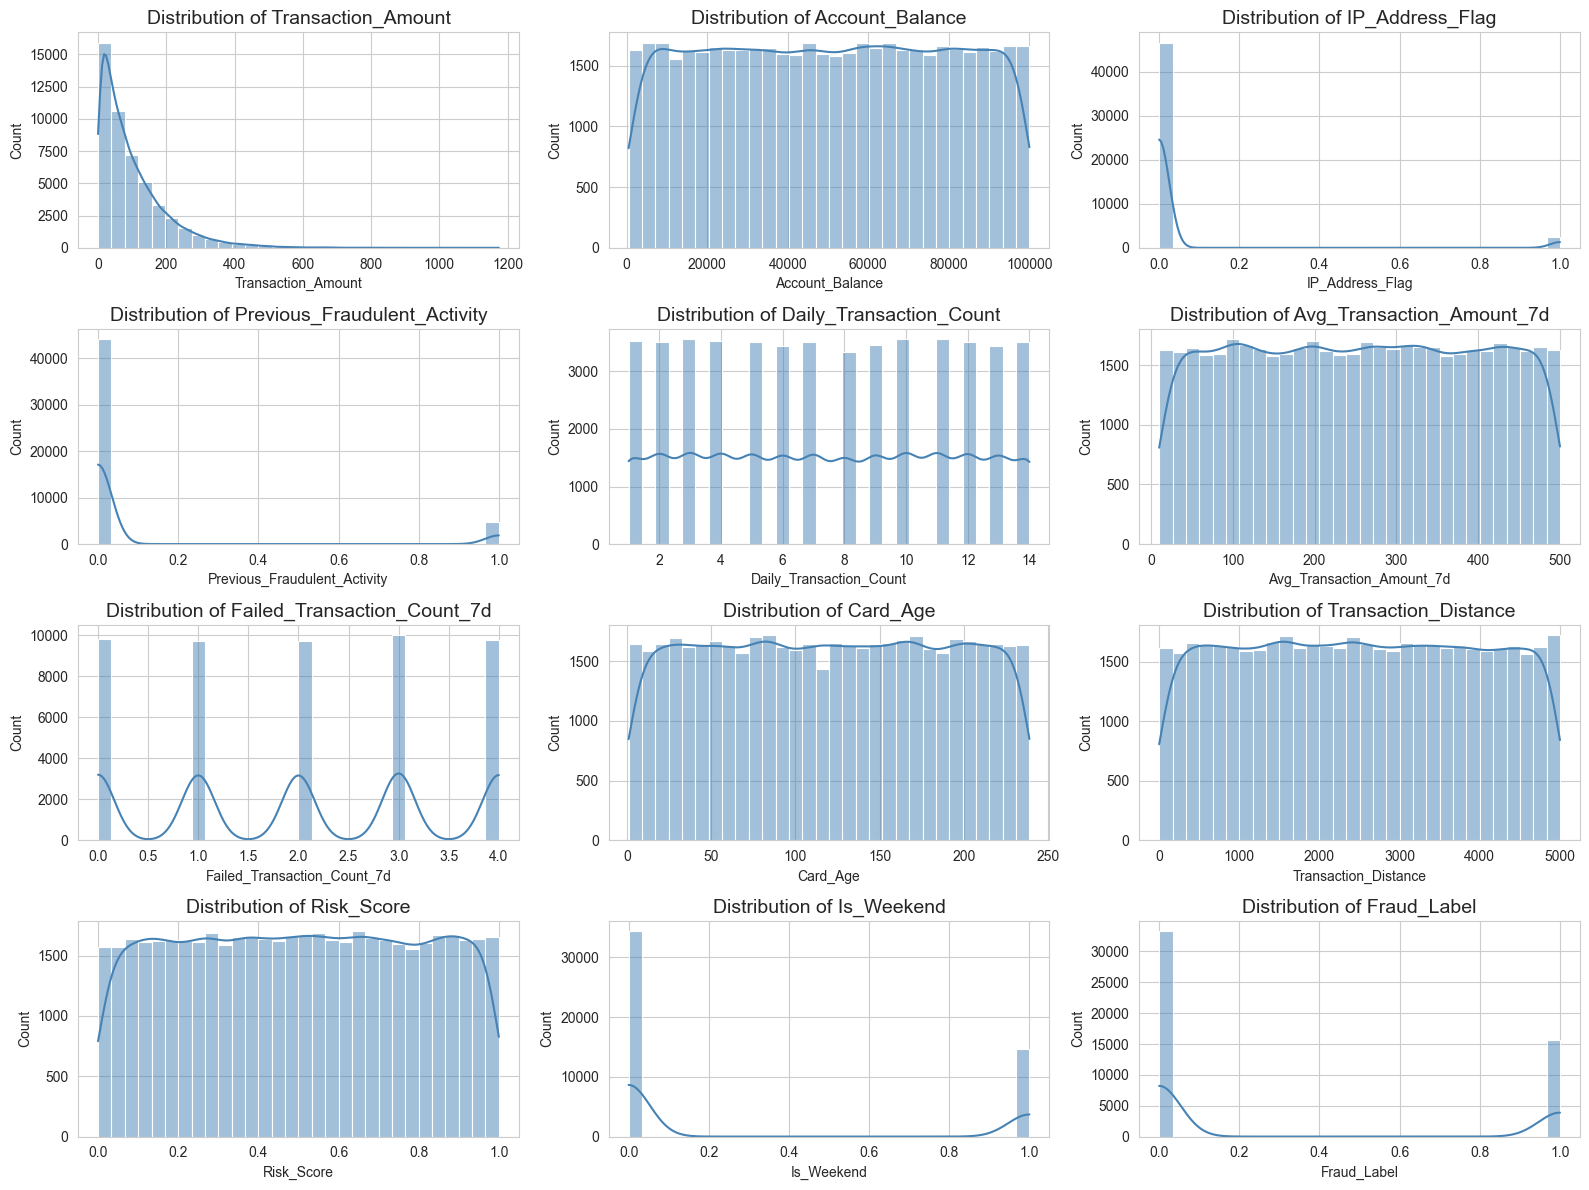

In [10]:
# 7. Visualize Numeric Feature Distributions
# -------------------------------
def plot_numeric_distributions(df):

    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    
    n_cols = len(numeric_columns)
    cols_per_row = 3  
    n_rows = (n_cols + cols_per_row - 1) // cols_per_row

    plt.figure(figsize=(16, n_rows * (6 / 2)))

    for i, col in enumerate(numeric_columns, 1):
        plt.subplot(n_rows, cols_per_row, i)
        sns.histplot(df[col], kde=True, bins=30, color='steelblue')
        plt.title(f'Distribution of {col}', fontsize=14)
        plt.xlabel(col)
        plt.ylabel('Count')

    plt.tight_layout()
    plt.show()
plot_numeric_distributions(df)

## 8. Categorical Feature Analysis

Count plots are used to analyze categorical variables
such as transaction type, device type, and authentication method.


In [ ]:
# 8. Visualize Categorical Features
# -------------------------------
categorical_cols = [
    "Transaction_Type", "Device_Type", "Location", "Merchant_Category",
    "Card_Type", "Authentication_Method", "Is_Weekend", "Fraud_Label"]
def plot_categorical_bars(df, categorical_cols, rot=0, figsize=(16, 6)):
    n_cols = len(categorical_cols)
    cols_per_row = 3  
    n_rows = (n_cols + cols_per_row - 1) // cols_per_row
    plt.figure(figsize=(figsize[0], n_rows * (figsize[1] / 2)))
    for i, col in enumerate(categorical_cols, 1):
        plt.subplot(n_rows, cols_per_row, i)
        sns.countplot(data=df, x=col, palette='dark')
        plt.title(f'{col} Distribution', fontsize=11)
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=rot)
    plt.tight_layout()
    plt.show()
plot_categorical_bars(df, categorical_cols)

# Feature Engineering and Data Preprocessing

This notebook focuses on data preprocessing and feature engineering steps
required before training machine learning models for fraud detection.
The goal is to clean the data, handle missing values, encode categorical features,
and prepare numerical features for modeling.


## 1. Import Required Libraries

We import libraries for data manipulation, preprocessing, and visualization.
These tools will be used to clean and transform the dataset.


In [ ]:
# -------------------------------
# 1. Import Libraries
# -------------------------------
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style("whitegrid")

## 2. Load Dataset

The raw transaction dataset is loaded from the `data` directory.
This dataset still contains missing values and unprocessed features.


In [4]:
# 2. Load Dataset
# -------------------------------
DATA_PATH = "../data/fraud_dataset_mod.csv"
df = pd.read_csv(DATA_PATH)

# Display first 5 rows
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,NaN,0.0,...,7.0,437.63,3.0,Amex,65.0,883.17,Biometric,0.8494,0.0,0.0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0.0,...,13.0,478.76,4.0,Mastercard,186.0,2203.36,Password,0.0959,0.0,1.0
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0.0,...,14.0,50.01,4.0,Visa,226.0,1909.29,Biometric,0.8400,NaN,1.0
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0.0,...,8.0,182.48,4.0,Visa,NaN,1311.86,OTP,0.7935,0.0,1.0
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0.0,...,14.0,328.69,4.0,Mastercard,140.0,966.98,Password,0.3819,1.0,1.0


## 3. Missing Value Analysis

Before preprocessing, we inspect missing values in each column
to determine appropriate imputation strategies.


In [5]:
# 3. Check Missing Values
# -------------------------------
print("Missing values before preprocessing:\n", df.isnull().sum())


Missing values before preprocessing:
 Transaction_ID                  1104
User_ID                          948
Transaction_Amount               982
Transaction_Type                 982
Timestamp                        992
Account_Balance                 1016
Device_Type                     1023
Location                        1000
Merchant_Category                975
IP_Address_Flag                  924
Previous_Fraudulent_Activity    1031
Daily_Transaction_Count         1029
Avg_Transaction_Amount_7d        996
Failed_Transaction_Count_7d      983
Card_Type                       1012
Card_Age                         960
Transaction_Distance            1025
Authentication_Method           1025
Risk_Score                       982
Is_Weekend                       980
Fraud_Label                     1031
dtype: int64


## 4. Handle Missing Values

- Numerical features are filled using the median value.
- Categorical features are filled using the mode.

This approach helps preserve data distribution and avoid data leakage.


In [6]:
# 4. Handle Missing Values
# -------------------------------
# Fill numeric columns with median
numeric_cols = df.select_dtypes(include=['float64']).columns
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing values after preprocessing:\n", df.isnull().sum())



C:\Users\Admin\AppData\Local\Temp\ipykernel_612\2329844195.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_612\2329844195.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 


Missing values after preprocessing:
 Transaction_ID                  0
User_ID                         0
Transaction_Amount              0
Transaction_Type                0
Timestamp                       0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
IP_Address_Flag                 0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Weekend                      0
Fraud_Label                     0
dtype: int64


## 5. Feature Engineering

In this step, new features are created to improve model performance
and represent transaction behavior more effectively.


### 5.1 Datetime Feature Extraction

The `Timestamp` column is converted into multiple meaningful features
such as transaction hour, day, month, and weekday.


In [ ]:
# 5.1 Convert Timestamp to datetime features
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Transaction_Hour'] = df['Timestamp'].dt.hour
df['Transaction_Day'] = df['Timestamp'].dt.day
df['Transaction_Month'] = df['Timestamp'].dt.month
df['Transaction_Weekday'] = df['Timestamp'].dt.weekday

# Drop original Timestamp
df.drop('Timestamp', axis=1, inplace=True)



### 5.2 Encoding Categorical Features

Categorical features are encoded using Label Encoding
to make them compatible with machine learning algorithms.


In [ ]:
# 5.2 Re-identify categorical columns AFTER dropping Timestamp
categorical_cols = df.select_dtypes(include=['object']).columns

# Encode categorical features
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

## 6. Feature Scaling

Numerical features are standardized using `StandardScaler`
to ensure that all features contribute equally to the model.
The target variable is excluded from scaling.


In [ ]:
# 6. Standardize Numeric Features
# -------------------------------
scaler = StandardScaler()
num_cols_for_scaling = numeric_cols.drop('Fraud_Label')  # Do not scale target column
df[num_cols_for_scaling] = scaler.fit_transform(df[num_cols_for_scaling])


## 7. Save Processed Dataset

The final preprocessed dataset is saved as a new CSV file.
This file will be used in the modeling and evaluation stages.


In [ ]:
# 7. Save Processed Dataset
# -------------------------------
PROCESSED_PATH = "../data/fraud_dataset_processed.csv"
df.to_csv(PROCESSED_PATH, index=False)
print(f"Processed dataset saved: {PROCESSED_PATH}")

# Modeling and Model Selection

In this notebook, we train and compare multiple machine learning models
for fraud detection. The goal is to evaluate baseline performance
and select the most suitable model for final evaluation.


## 1. Import Required Libraries

This section imports machine learning models, evaluation metrics,
and utility libraries required for training and testing classifiers.


In [ ]:
# 1. Import Libraries
# -------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style("whitegrid")


## 2. Load Preprocessed Dataset

The cleaned and feature-engineered dataset generated in the previous step
is loaded for model training and evaluation.


In [ ]:
# 2. Load Processed Dataset
# -------------------------------
DATA_PATH = "../data/fraud_dataset_processed.csv"
df = pd.read_csv(DATA_PATH)

# Split features and target
X = df.drop("Fraud_Label", axis=1)
y = df["Fraud_Label"]


## 3. Define Features and Target Variable

- Features (`X`) include all columns except the target.
- Target (`y`) is the `Fraud_Label` column.


In [ ]:
# 3. Split features and target
# -------------------------------
X = df.drop("Fraud_Label", axis=1)
y = df["Fraud_Label"]


## 4. Train-Test Split

The dataset is split into training and testing sets.
Stratified sampling is used to preserve the original class distribution.


In [ ]:
# 4. Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## 5. Initial Model Training

Two baseline models are trained and evaluated:
- Logistic Regression
- Random Forest Classifier

These models provide a balance between interpretability and performance.


### 5.1 Logistic Regression

Logistic Regression is used as a baseline linear model
to evaluate how well simple decision boundaries perform.


In [ ]:
# 5.1 Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:,1]

### 5.2 Random Forest Classifier

Random Forest is an ensemble-based model capable of capturing
non-linear patterns and complex feature interactions.


In [ ]:
# 5.2 Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

## 6. Model Evaluation

A custom evaluation function is used to:
- Print classification metrics
- Compute AUC-ROC
- Visualize the confusion matrix


In [ ]:
# 6. Model Evaluation
# -------------------------------
def evaluate_model(y_true, y_pred, y_prob, model_name="Model"):
    print(f"Evaluation Report - {model_name}:\n")
    print(classification_report(y_true, y_pred))
    print(f"AUC-ROC: {roc_auc_score(y_true, y_prob):.4f}")
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_lr, y_prob_lr, "Logistic Regression")

# Evaluate Random Forest
evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest")

## 7. Save Final Model

The best-performing model is saved to disk
so it can be reused during the final evaluation stage.


In [ ]:
# 7. Save Selected Model
# -------------------------------
import os
import joblib

MODEL_DIR = "../src/models"
os.makedirs(MODEL_DIR, exist_ok=True)

# Save Random Forest
rf_model_path = os.path.join(MODEL_DIR, "rf_model.pkl")
joblib.dump(rf_model, rf_model_path)
print(f"Random Forest model saved: {rf_model_path}")


# Final Model Evaluation

This notebook focuses on the final evaluation of the selected model.
We analyze classification metrics, visualize the confusion matrix,
and plot the ROC curve to assess model performance.


## 1. Import Required Libraries

Libraries for loading the trained model, evaluating predictions,
and visualizing performance metrics are imported.


In [ ]:
# 1. Import Libraries
# -------------------------------
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style("whitegrid")


## 2. Load Trained Model

The trained Random Forest model saved in the previous step
is loaded from disk for final evaluation.


In [ ]:
# 2. Load Saved Model
# -------------------------------
MODEL_PATH = "../src/models/rf_model.pkl"
model = joblib.load(MODEL_PATH)
print(f"Model loaded: {MODEL_PATH}")


## 3. Load Evaluation Dataset

The preprocessed dataset is loaded and used for generating
predictions with the trained model.


In [ ]:
# 3. Load Test Data
# -------------------------------
DATA_PATH = "../data/fraud_dataset_processed.csv"
df = pd.read_csv(DATA_PATH)

X_test = df.drop("Fraud_Label", axis=1)
y_test = df["Fraud_Label"]


## 4. Generate Predictions

The model predicts class labels and probabilities
for the evaluation dataset.


In [ ]:
# 4. Make Predictions
# -------------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

## 5. Classification Report

A detailed classification report is generated
to evaluate precision, recall, and F1-score.


In [ ]:
# 5. Classification Report
# -------------------------------
print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred))


## 6. Confusion Matrix

The confusion matrix is visualized and saved
to better understand classification errors.


In [ ]:
# 6. Confusion Matrix
# -------------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("../results/confusion_matrix.png")
plt.show()

## 7. ROC Curve Analysis

The ROC curve and AUC score are computed and visualized
to measure the model's ability to distinguish between classes.


In [ ]:
# 7. ROC Curve
# -------------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1], [0,1], color="gray", lw=1, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.savefig("../results/roc_curve.png")
plt.show()